In [1]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import sympy

In [70]:
from matplotlib_venn import venn3

In [2]:
%matplotlib inline

In [71]:
def draw_venn(sets, set_labels=('A', 'B', 'C')):
    venn3(subsets=sets, set_labels=set_labels)
    plt.savefig('owarai.svg')
    plt.show()

In [4]:
from requests_oauthlib import OAuth1Session
import json
import settings

In [5]:
twitter = OAuth1Session(settings.CONSUMER_KEY, settings.CONSUMER_SECRET, settings.ACCESS_TOKEN, settings.ACCESS_TOKEN_SECRET)

In [6]:
import pandas as pd

In [23]:
def get_followers(sn):
    params = {}
    req = twitter.get("https://api.twitter.com/1.1/followers/ids.json?screen_name={sn}&count=5000".format(sn=sn), params = params)
    tweets = json.loads(req.text)
    
    df_tbl = pd.DataFrame(columns=['followers'])
    for follower in tweets['ids']:
        #print(follower)
        df_addition_row = pd.DataFrame([follower])
        df_addition_row.columns = ['followers']
        df_tbl = pd.concat([df_tbl, df_addition_row])
        
    cnt = df_tbl.count().followers
    return df_tbl, cnt

In [ ]:
def r_list(sn):
    df_tbl, cnt = get_followers(sn)
    list_followers = list(df_tbl.values.flatten())
    r = int(cnt / 7)
    cards = [m for m in list_followers]
    randam_list = random.sample(cards, r)
    
    return randam_list

In [24]:
#get followers
df_ao, cnt_ao = get_followers('HisashiAoyama')
df_ks, cnt_ks = get_followers('kishikennosuke')
df_wd, cnt_wd = get_followers('dawakkk')

In [52]:
#to type list
ao = list(df_ao.values.flatten())
ks = list(df_ks.values.flatten())
wd = list(df_wd.values.flatten())

In [53]:
r_ao = int(cnt_ao / 7)
r_ks = int(cnt_ks / 7)
r_wd = int(cnt_wd / 7)

In [56]:
import random

In [57]:
cards = [m for m in ao]
ao = random.sample(cards, r_ao)
cards = [m for m in ks]
ks = random.sample(cards, r_ks)
cards = [m for m in wd]
wd = random.sample(cards, r_wd)

In [60]:
#Finite Set
ao = sympy.FiniteSet(*ao)
ks = sympy.FiniteSet(*ks)
wd = sympy.FiniteSet(*wd)

In [61]:
plt.figure(figsize=(5, 5))

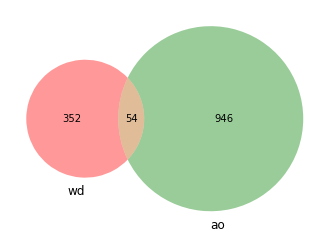

In [65]:
draw_venn([wd, ao], set_labels=('wd', 'ao'))

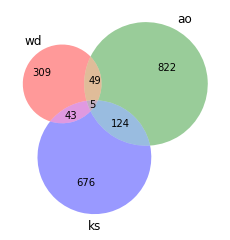

In [72]:
draw_venn([wd, ao, ks], set_labels=('wd', 'ao', 'ks'))